---

# Problem 1: Linear least squares

## Least squares formulation

"Linear least squares" is a method for fitting a model which depends **linearly on its parameters**. Outside astronomy (for example, machine learning), the popular term for linear least-squares is "linear regression."

- An important note: You can use linear least squares even when your model **isn't linear with respect to the data**. For example, the model $y(x)=\beta x^2$ is linear with respect to the parameter $\beta$, even though it's nonlinear with respect to the data $x$; therefore, we can use linear least squares to fit $\beta$.

**Setup:** When using linear least squares, you assume that your data can be expressed with the following equation:
 \begin{equation}
   {\bf y} = {\bf X}{\bf \beta} + {\bf \beta_0} + {\bf \epsilon}
 \end{equation}

where $y_i$ is the $i$th measurement and $\epsilon_i$ the corresponding noise; here $i$ ranges from 1 to $n$. When fitting your model, you will be given input data $\bf X$, then fitting parameters $\bf \beta$ and $\beta_0$ to predict measurements $\bf y$ as accurately as possible.

Some jargon:
- ${\bf y}$ is called the "response" vector,
- $\beta_0$ is the intercept,
- ${\bf \beta}$ is the slope, and 
- ${\bf X}$ is the "predictor" matrix.

Each of these parameters has a specific shape.
- $\bf \beta$ has shape $(m,1)$ where $m$ is the number of parameters in the model.
- $\bf y$ has shape $(n,1)$, where $n$ is the number of dimensions you are trying to predict.
- Finally $\bf X$ is a matrix with dimensions $(n,m)$.

These models are designed to have multiple input dimensions and multiple output dimensions. For example, a model could use a galaxy's **magnitude in the i-band, r-band and g-band** to predict its **mass** and its **redshift**. It would then have $m=3$ (three dimensions of input data) and $n=2$ (two dimensions of output data). [*Caution - this is purely for example purposes and would probably be a terrible model.*]

A few final notes:

- Usually the intercept $\beta_0$ is included in ${\bf \beta}$ (and a column of 1's is appended to $\bf X$ to match).
- When $m>1$ -- i.e. when there are multiple parameters -- this problem is called "multiple linear regression". "Multi-variate (multiple)" linear regression is when ${\bf y}$ has more than one column. 
- Finally, the least squares is optimal only when ${\bf\epsilon}$ results from Gaussian processes. That is, the error on any combination of parameters must form a Gaussian distribution.

**Fitting a model:** Least-squares regression refers to finding the best-fit parameters $\hat \beta$ minimizing the sum of squared errors between the data and your model's predictions. There's a simple formula for this:
 \begin{eqnarray*}
  \bf{\hat{\beta}} &=&({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf
  y}.
 \end{eqnarray*}
The post-fit value and the corresponding residuals are given by
 \begin{eqnarray*}
  \hat{\bf y} = {\bf X}\hat{\bf\beta},\qquad {\bf e} = {\bf y} -
  {\hat{\bf y}}.
 \end{eqnarray*}
Linear algebra assures you that the resulting sum of the squares
of the residuals, ${\bf e}{\bf e}^T$, is the smallest value
possible.

## **The problem**: Improving telescope pointing

Recall that astronomers use two coordinates to identify objects on the sky.
- **Right ascension** (RA) is parallel to the direction of Earth's rotation, and it is a polar angle (similar to latitude on Earth).
- **Declination** is perpendicular to right ascension, and is the azimuthal angle (similar to longitude).

We will be using a linear least squares method to create and fit a model of "pointing error" (error in aligning to a requested set of angles) on a particular telescope, the Palomar 48-inch Oschin telescope (or P48 for short). Each night, P48 is given a long list of requested observation locations in terms of right ascension and declination. It then rotates on its two axes to find that location: These axes are called the **hour angle (HA)** and **declination (DEC)** axes.
- Hour angle corresponds to right ascension. However, the **right ascension of a target is constant**, while the **hour angle needed to observe it changes depending on the time of day** due to the rotation of the Earth.

A telescope's pointing performance measures how accurately it is able to align itself to a requested hour angle $h$ and declination angle $\delta$. These errors are expressed $\Delta h$ and $\Delta \delta$ (or "raoff" and "decoff").

For this analysis, we will use a basic pointing model which accounts for a few things (explained in more detail in the appendix):

1. Non-alignment of the axis of the fork of the telescope and the Earth's rotation
2. Deviation from orthogonality between the axes of the astronomical "latitude" and "longitude" ("hour angle" and "declination") motors
3. Lack of parallelism between the optical and mechanical axes of the telescope ("collimation") and 
4. A simple model for the mechanical warping ("flexure") of the telescope.

This model is described in a classic paper by [P. T. Wallace & K. P. Tritton (1979; MNRAS)](http://articles.adsabs.harvard.edu/pdf/1979MNRAS.189..115W). It has been applied to other telescopes than the P48 since its publication: This model estimated that the UK 48-inch Schmidt telescope, a later version of the P48, could accurately point to locations on the sky to within 1/10 of a degree.

### The model

The Wallace & Tritton model maps a series of requested angles, $\bf h$ and $\bf \delta$, to the expected errors on these angles. The equation is given below:
\begin{eqnarray}
		\label{eq:dh}
	\Delta h&=& \tan(\delta)\big[{\rm ME}\sin(h)-{\rm MA}\cos(h)+{\rm NP}\big]+
	+ {\rm CH}\sec(\delta) + {\rm IH}\\
		\label{eq:dd}\cr
	\Delta\delta &=& \cos(h)\big[{\rm ME}+{\rm FO}\big]+{\rm MA}\sin(h)+{\rm ID}
\end{eqnarray}

There are 7 parameters in this model: $\rm ME$, $\rm MA$, $\rm NP$, $\rm CH$, $\rm FO$, $\rm ID$, and $\rm IH$ (these are described in much more detail in the appendix). Thus, we can construct a vector for $\bf \beta$:

 \begin{equation*}
  {\bf\beta}\equiv\begin{pmatrix} {\rm ME}\\ {\rm MA}\\ {\rm NP}\\
  {\rm CH}\\ {\rm FO}\\ {\rm ID}\\ {\rm IH} \end{pmatrix}.
 \end{equation*}

Similarly, we are trying to predict the errors $\Delta h$ and $\Delta \delta$ on each measurement. Thus, if we are taking $n$ measurements, we can (arbitrarily) construct $\bf y$ as a $2n \times 1$ vector like so:

 \begin{equation*}
  {\bf y}\equiv\begin{pmatrix} \Delta h_1\\ \Delta\delta_1\\ \Delta
  h_2\\ \Delta\delta_2\\ ...
 \end{pmatrix}
\end{equation*} where the subscript is the index of the measurements,
$i=1,2,...n_{meas}$. (This approach is not unique. For instance, we could
have listed all of $\Delta h$ first and followed it by $\Delta\delta$. Similarly, we could have constructed $\beta$ differently.)

Having specified ${\bf y}$ and ${\bf\beta}$ we now have fully
specified the rules for  constructing the response matrix, ${\bf
X}$.  For instance, consider a pair or rows of ${\bf X}$  with row
index  $K=2i-1$ and $ K^\prime=K+1$:
 \begin{eqnarray*}
  {\bf X}=\begin{bmatrix}
   .&.&.&.&.&.&.&\\
    \sin(h_K)\tan(\delta_K) & -\cos(h_K)\tan(\delta_K) & \tan(\delta_K)&
   \sec(\delta_K) &0 &0 &1\\ \cos(h_{K^\prime}) & \sin(h_{K^\prime})
  & 0 & 0 & \cos(h_{K^\prime}) & 1 & 0\\
   .&.&.&.&.&.&.&
 \end{bmatrix}. 
\end{eqnarray*}  
The size of ${\bf X}$ matrix is ($2n,7$) whereas that of ${\bf y}$ is $(2n,1)$.

With $\bf y$, $\bf \beta$ and $\bf X$ defined, we have completely specified the model. We now need to fit it via least squares regression.

### Data

In the "data/" folder, we placed files which yields offsets for a given night. Each field
observed during a given night results in a data record: time,
ra, dec, ha, raoff, decoff.  The collection of records for a given
night constitute our basic and essential data.  Refined
models would benefit from having pressure and temperature (top of
dome, bottom of dome, ambient) data.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.coordinates import Angle
from astropy.time import Time
import astropy.units as u
import matplotlib.pyplot as plt

INFILE='data/2021-02-04.csv'
df = pd.read_csv(INFILE)
t = Table.from_pandas(df)

start_times, end_times = [], []
ras, decs, has = [], [], []
ra_offset, dec_offset = [], []
for row in t:
    start_times.append(Time(row["start_time"], format="iso"))
    end_times.append(Time(row["end_time"], format="iso"))
    ras.append(Angle(row["ra"], unit=u.hour).deg)
    decs.append(Angle(row["dec"], unit=u.deg).deg)
    has.append(Angle(row["ha"], unit=u.hour).deg)
t["start_time"], t["end_time"] = start_times, end_times
t["ra"], t["dec"], t["ha"] = ras, decs, has

## Q1: Form the X-array and y-array (in preparation for least-squares)

In [3]:
def genX_tpoint(ha, dec):
    sh=np.sin(ha*(2*np.pi/360))
    ch=np.cos(ha*(2*np.pi/360))
    td=np.tan(dec* (2*np.pi/360))
    sd=1.0/np.cos(dec* (2*np.pi/360))

    x = np.zeros((2,7))
    # YOUR CODE HERE: See X equation
    x[0,:]=[sh*td, -ch*td, td, sd, 0,  0, 1]
    x[1,:]=[ch,     sh,    0,  0,  ch, 1, 0]
    
    return x

n=len(t["ha"])
X=np.zeros((2*n,7))
y=np.zeros((2*n,1))

for j in range(n):
    ind=2*j  
    #convert raoff1 to haoff1 (see Wallace & Tritton 1976)
    y[ind]=t["ra_offset"][j]/np.cos(t["dec"][j] * (2*np.pi/360))
    y[ind+1]=t["dec_offset"][j]

    xhd = genX_tpoint(t["ha"][j],t["dec"][j])
    X[ind,:]=xhd[0,:]
    X[ind+1,:]=xhd[1,:]

## Q2: Solve the least-squares problem

Compute b_hat:
 \begin{eqnarray*}
  \bf{\hat{\beta}} &=&({\bf X}^\prime{\bf X})^{-1}{\bf X}^\prime{\bf
  y}.
 \end{eqnarray*}

In [4]:
# YOUR CODE HERE
D=np.dot(X.T,X)
b_hat = np.dot(np.linalg.lstsq(D, X.T)[0],y) 

MODEL = {}
MODEL["ME"] = b_hat[0]
MODEL["MA"] = b_hat[1]
MODEL["NP"] = b_hat[2]
MODEL["CH"] = b_hat[3]
MODEL["FO"] = b_hat[4]
MODEL["ID"] = b_hat[5]
MODEL["IH"] = b_hat[6]

/Users/mcoughlin/opt/anaconda3/envs/ast8581/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


## Q3: Plot the residuals as a function of HA and Declination

What is the approximate size of the circle (in arcseconds) which contains most of the points?

In [5]:
def model_offsets(MODEL, ha, dec):
    ME = MODEL["ME"]
    MA = MODEL["MA"]
    NP = MODEL["NP"]
    CH = MODEL["CH"]
    FO = MODEL["FO"]
    ID = MODEL["ID"]
    IH = MODEL["IH"]

    m_raoff=((ME*np.sin(ha*(2*np.pi/360))-MA*np.cos(ha*(2*np.pi/360)))*np.tan(dec*(2*np.pi/360))+\
             NP*np.tan(dec*(2*np.pi/360)) + CH/np.cos(dec*(2*np.pi/360)) + IH)*np.cos(dec*(2*np.pi/360))
    m_decoff=(ME+FO)*np.cos(ha*(2*np.pi/360)) + MA*np.sin(ha*(2*np.pi/360)) + ID

    return m_raoff, m_decoff

m_raoff, m_decoff = model_offsets(MODEL, t["ha"], t["dec"])

(-50.0, 50.0)

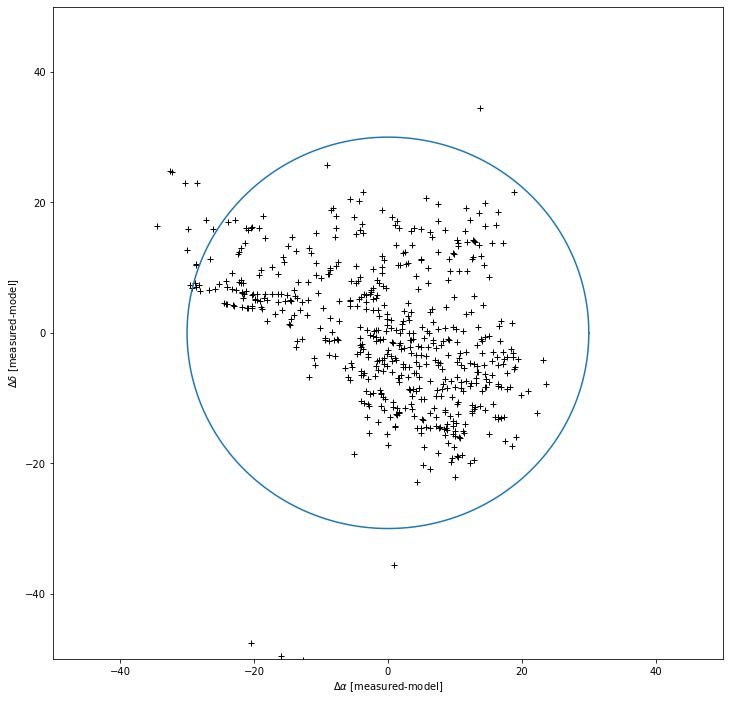

In [6]:
plt.figure(figsize=(12,12))
plt.plot(t["ra_offset"]-m_raoff, t["dec_offset"]-m_decoff, 'k+')
thetas = np.linspace(0,2*np.pi,1000)
R = 30
plt.plot(R*np.cos(thetas), R*np.sin(thetas))
plt.xlabel('$\\Delta \\alpha$ [measured-model]')
plt.ylabel('$\\Delta \\delta$ [measured-model]')
plt.xlim([-50,50])
plt.ylim([-50,50])

The TPOINT model parameters show that the largest terms contributing to the error budget are due to collimation and flexure. Beyond that there are unexplained offsets arising in the far East (HA$>4$\,hr) and far North ($\delta>60^\circ$).

## Q4: Using a Gaussian Process to improve upon the estimates

In [10]:
# RUN THIS
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, ConstantKernel, RationalQuadratic

As a reminder from class: for our data to be well interpolated by this Gaussian Process, it will need to be rescaled such that it has zero mean and unit variance. There are [standard methods for doing this](http://scikit-learn.org/stable/modules/preprocessing.html), but we'll do this rescaling here for transparency - and so we know what to add back in later!

In [11]:
class Rescale():
    def __init__(self, y):
        self.original_data = y
        self.mean = np.mean(y)
        self.std = np.std(y)
        self.transform()
        return
    def transform(self):
        self.y = (self.original_data - self.mean) / self.std
        return()
    def invert(self, scaled_y):
        return (scaled_y * self.std + self.mean)     

In [12]:
train_idx = np.random.choice(np.arange(len(t["ha"])),int(len(t["ha"])/3),replace=False)
test_idx = np.setdiff1d(np.arange(len(t["ha"])), train_idx)

ha_rescaled = Rescale(t["ha"])
dec_rescaled = Rescale(t["dec"])
ra_offset_rescaled = Rescale(t["ra_offset"])
dec_offset_rescaled = Rescale(t["dec_offset"])

Use the GaussianProcessRegressor with a RationalQuadratic kernel to predict the offsets

In [13]:
# Use all of our datapoints:
x_rescaled = np.vstack((ha_rescaled.y,dec_rescaled.y)).T
rescaled_ra_y = ra_offset_rescaled.y.T
rescaled_dec_y = dec_offset_rescaled.y.T

# Instantiate a GP model, including observational errors:
kernel = RationalQuadratic(length_scale=1.0, alpha=0.1)

gp_ra = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, 
                                 random_state=0)

# Fit it to our noisy datapoints:
gp_ra.fit(x_rescaled[train_idx,:], rescaled_ra_y[train_idx])

# Now predict y(x) everywhere on our xgrid: 
rescaled_ygrid_ra, rescaled_ygrid_ra_err = gp_ra.predict(x_rescaled[test_idx,:], return_std=True)

# And undo scaling:
ra_y = ra_offset_rescaled.invert(rescaled_ygrid_ra)

gp_dec = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, 
                                  random_state=0)

# Fit it to our noisy datapoints:
gp_dec.fit(x_rescaled[train_idx,:], rescaled_dec_y[train_idx])

# Now predict y(x) everywhere on our xgrid: 
rescaled_ygrid_dec, rescaled_ygrid_dec_err = gp_dec.predict(x_rescaled[test_idx,:], return_std=True)

# And undo scaling:
dec_y = dec_offset_rescaled.invert(rescaled_ygrid_dec)

## Q5: Plot the residuals as a function of HA and Declination

What is the approximate size of the circle (in arcseconds) which contains most of the points? Did your Gaussian Process improve over the linear regression?

(-50.0, 50.0)

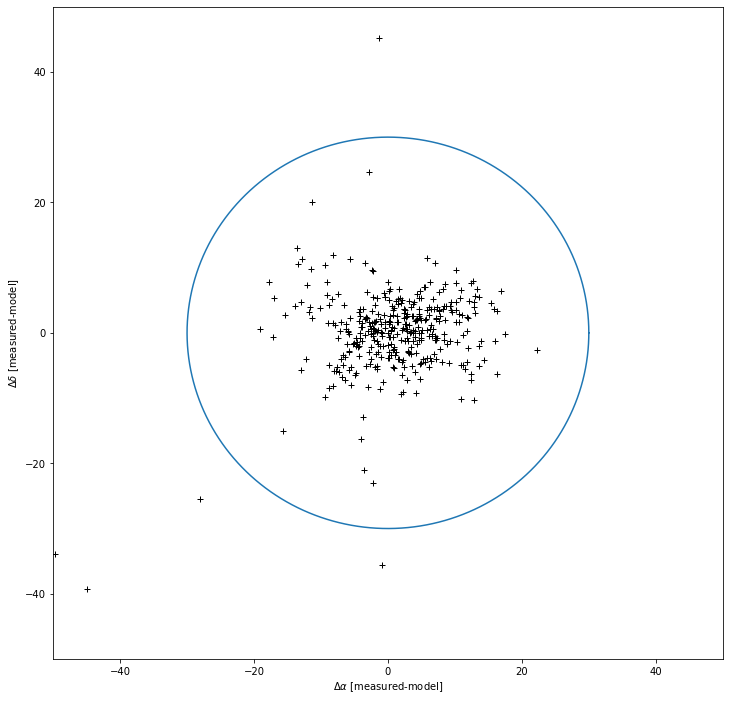

In [15]:
# YOUR CODE HERE
plt.figure(figsize=(12,12))
plt.plot(t["ra_offset"][test_idx]-ra_y, t["dec_offset"][test_idx]-dec_y, 'k+')
thetas = np.linspace(0,2*np.pi,1000)
R = 30
plt.plot(R*np.cos(thetas), R*np.sin(thetas))
plt.xlabel('$\\Delta \\alpha$ [measured-model]')
plt.ylabel('$\\Delta \\delta$ [measured-model]')
plt.xlim([-50,50])
plt.ylim([-50,50])

# Problem 2: The Story of GW170817

Since 2015, astronomers have detected roughly 20 confirmed signals from gravitational waves (GWs), with dozens more unconfirmed candidate signals. The science of GWs has been driven by three GW detectors: Two [LIGO detectors](https://www.ligo.caltech.edu/page/what-is-ligo) at Hanford, WA and Livingston, LA, plus the [Virgo detector](http://public.virgo-gw.eu/virgo-in-a-nutshell/) in Italy.

Before Aug 17th, 2017, there were only 4 confirmed detections of gravitational waves: GW150914 (the first one), GW151226, GW170104, and GW170814 (plus LVT151012 as a tentative detection). The last one (GW170814) is the first detected by both LIGO and VIRGO, which joined the collaboration on Aug 1st, 2017. So, it was only a few days after that that they detected another very important event.

On Aug 17th, 2017, at 12:41:04 UTC, a clear signal was detected by LIGO-Hanford (just at the end of the second LIGO cycle – 9 days later and LIGO would have have been off!). The raw data from LIGO-Livingston detector included a glitch. After reprocessing the data to remove this artifact there was a another clear signal. The VIRGO didn’t manage to show any significant signal but that was due to its antenna orientation and sensitivity (which is important to constrain the sky positions though). The duration of the signal was approximately 60 s [allowing for about 3000 cycles.] (remove?) This was the longest and the strongest (at SNR~32.4) signal detected so far.

<img src="figures/GW170817-bns_figure1.png" alt="" width="500" height="695">

However, such a long signal is expected to be produced by the merging of neutron stars. And indeed the total mass estimate was 2.73–3.29 M☉ (where M☉ = the Sun's mass) with a mass ratio of 0.4–1.0 between the merging objects. This means that the individual masses of the sources that merged were 1.36–2.26 M☉ and 0.86–1.36 M☉, well within the limits of neutron star masses.

<img src="figures/GW170817-milkyway-triangulation-small.png" alt="" width="500" height="695">

We can pinpoint sources like GW170817 much more accurately now that we can triangulate the signal between Hanford, Livingston, and Virgo. Above, the rapid Hanford-Livingston localization is shown in blue, and the final Hanford-Livingston-Virgo localization is in green. The gray rings are one-sigma triangulation constraints from the three detector pairs.

Almost at the same time (~2s after the GW detection) FERMI (and INTEGRAL) detected a short Gamma-Ray Burst (GRB170817A). The detection of such a contemporaneous signal triggered the community that something exceptional was going on. It is interesting to note that the detection of the GRB only (without any GW detection) wouldn’t be sufficient to mobilize a follow-up campaign, especially because the error of sky position from FERMI is huge. The localization obtained from the GW detection and the information that an electromagnetic (EM) counterpart may exist increased the significance of this source.

<img src="figures/GW170817-data-mod.png" alt="" width="500" height="695">

### Searching for the kilonova

Apart from the gravitational waves, a neutron star merger would become visible in the electromagnetic (EM) spectrum as a **kilonova**. By 2017, several kilonovae had already been oberved, and it was known that they typically peaked in brightness for only a few days before fading.

Very soon after the detection all collaborators of LIGO/VIRGO were informed about the possible EM counterpart. Around 70 teams around the world started using almost all available (both ground and space) telescopes to detect and study it. The collaboration quickly compiled a list of ~100 candidate galaxies according to the properties derived from the GW detection (see [Coulter et al. 2017](https://ui.adsabs.harvard.edu/abs/2017Sci...358.1556C/abstract) for more details), and aimed to find new light sources in these galaxies. The Swope telescope in Chile was the best-positioned for these observaitons, and on only the 9th image (and only 20 minutes into their observations) Swope discovered a new light source in the galaxy NGC 4993 -- a galaxy they had classified as the 12th most probable to host the GW source. (Impressively, its V magnitude was at 17.35 mag, which was bright enough to be visible by many amateur astronomers!)

Luck was definitely on our side, as the position and the timings were marginal: the GRB was not exciting by itself, SSS17a was setting within one hour, the transient would have been hidden behind the Sun one month later, and only 9 days later LIGO would have been down. Despite these constraints, the astronomical community and the whole collaboration proved to be prepared enough not to lose this unique opportunity. The event mobilized almost half the astronomers around the globe (approximately 4000 people in a community of 10000). This led to a an impressive number of publications counting ~250 GCN circulars and ~80 papers during the “first wave” of its announcement only (with the most striking cases of the ApJ Letter of 60 pages containing all obtained observations; LIGO et al. 2017). The new era of multi-messenger astronomy is here and will routinely discover and study new events aftert the future upgrades of the GW detectors.


### The kilonova lightcurve

The image below shows the kilonova as it was observed on August 17, 2017:

<img src="figures/GW170817-Coulter2017-F4.large_.jpg" alt="" width="500" height="695">

Both the light curves and the spectra display fast changes in the temperature of the material expelled from the collision:

<img src="figures/GW170817-Drout2017-F3.large_.jpg" alt="" width="500" height="695">

Even within the first hour of observations the spectra show a drop of temperature from ~11000K to 9300K, which is indicative of a material expansion at ~0.3c.

![GW170817 timelapse](figures/Time-lapse-sequence-of-kilonova.gif)

In total, its evolution was remarkably fast, unlike anything else we have observed so far.

This very fast expansion of the material and its cooling could be attributed to the formation of lanthanide elements through the [r-process](https://en.wikipedia.org/wiki/R-process). All elements up to Fe can be produced within the massive stars and some of the heavier elements during their supernovae explosions. Theory predicted that the majority of the heaviest elements (such as gold, platinum, uranium, etc) should be produced during the merging process of neutron stars, where a large number of neutrons are available within very short times. But we lacked observations up to now.

The current models of kilonovae are only partly able to fit the our observed data on kilonovae, but help to derive important conclusions regarding the nature of these explosions. In particular, SSS17a could be described better by a two-component mass ejection, with each component being responsible mainly for the the early and later behavior. Estimates of the released material reach up to a few Earth masses for gold and platinum (and up to 16000 Earth masses for heavier elements in total).


## **Problem summary:** Predicting neutron star properties from the GW170817 lightcurve

As explained in the intro, the astronomical community went to immense effort to obtain the lightcurve for the GW170817 kilonova. How can we analyze this lightcurve to obtain information about the neutron stars that merged? In this problem, we will use **PCA** and **Gaussian process modeling** to determine the a best-fit model for GW170817's lightcurve from a grid of modeled lightcurves.

---

**The model grid:** While kilonova observations are rare, astronomers have been able to model the lightcurve that would arise given a set of initial conditions. For this problem, we will use a grid of models from [Dietrich et al. 2020](https://arxiv.org/pdf/2002.11355.pdf) that predict kilonova lightcurves based on a small number of parameters that describe the merger. These models use four parameters ($M^{dyn}_{ej}$, $M^{wind}_{ej}$, $\phi$ and $\theta$), which are described more fully in paper.*

(In short: $M^{dyn}_{ej}$ and $M^{wind}_{ej}$ measure the amount of mass ejected from the merger due to different processes, while $\phi$ is related to the chemical composition of this ejected mass and $\theta$ is the angle between the merger's plane of rotation and the observer.)

**Fitting a model to GW170817's lightcurve:** Our goal for this problem is to to determine the best-fit model parameters for GW170817 based on its observed lightcurve. While this will be similar to model-fitting tasks on past homeworks, there are two major obstacles in our way this time:
1. We don't have a continuous map between "merger parameters" and "observed lightcurves". Instead, we only know the observed lightcurves for the DISCRETE grid of parameters for which lightcurves were simulated. (Eg: we may know the lightcurves to expect for $m_{ejected} = m_1$ and $m_{ejected} = m_2$, but not for any masses between $m_1$ and $m_2$.)
2. The lightcurve predicted by each set of parameters is **extremely high-dimensional**: It predicts the magnitude of the kilonova at MANY different times following the neutron star merger.

Fortunately, we now have the tools to overcome these obstacles! The outline of this problem is as follows:
- First, you will reduce the dimensionality of the lightcurve dataset by using PCA: Each lightcurve will be represented by a small number of "eigenvalues", rather than the full lightcurve. After performing PCA, you will have a discrete grid of models that relate merger parameters to a few **lightcurve eigenvalues** rather than the whole lightcurve.
- Next, you will model this grid as a Gaussian process. This will allow you to form a **continuous map** from merger parameters to lightcurve eigenvalues.
- Finally, you will calculate the eigenvalues of the GW170817 lightcurve itself. Using the map from above, you can convert these eigenvalues directly to the set of merger parameters that most likely resulted in this lightcurve!

At the end of this problem, you will have predicted the **total mass ejected** from the GW170817 merger as well as some of its **chemical properties**.


In [26]:
# RUN THIS

import pandas as pd
import os
import sys
import glob
import numpy as np
from scipy.interpolate import interpolate as interp
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import sklearn as sk
import pickle

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, ConstantKernel, RationalQuadratic

sns.set(style="ticks")
%matplotlib inline

In [2]:
# RUN THIS

def read_files(files, tt, filts):

    names = []
    mags = {}
    for filename in files:
        name = filename.replace(".txt","").replace(".dat","").split("/")[-1]
        mag_d = np.loadtxt(filename)

        t = mag_d[:,0]
        mags[name] = {}
        mags[name]["t"] = mag_d[:,0]
        mags[name]["u"] = mag_d[:,1]
        mags[name]["g"] = mag_d[:,2]
        mags[name]["r"] = mag_d[:,3]
        mags[name]["i"] = mag_d[:,4]
        mags[name]["z"] = mag_d[:,5]
        mags[name]["y"] = mag_d[:,6]
        mags[name]["J"] = mag_d[:,7]
        mags[name]["H"] = mag_d[:,8]
        mags[name]["K"] = mag_d[:,9]

        names.append(name)

    magkeys = mags.keys()    
    for jj, key in enumerate(magkeys):
        keySplit = key.split("_")

        if "nsns" in key:

            mejdyn = float(keySplit[2].replace("mejdyn",""))
            mejwind = float(keySplit[3].replace("mejwind",""))
            phi0 = float(keySplit[4].replace("phi",""))
            theta = float(keySplit[5])

            mags[key]["mej_dyn"] = mejdyn
            mags[key]["mej_wind"] = mejwind
            mags[key]["phi"] = phi0
            mags[key]["theta"] = theta

        elif "nsbh" in key:

            mej_dyn = float(keySplit[2].replace("mejdyn",""))
            mej_wind = float(keySplit[3].replace("mejwind",""))
            phi = float(keySplit[4].replace("phi",""))
            theta = float(keySplit[5])

            mags[key]["mej_dyn"] = mej_dyn
            mags[key]["mej_wind"] = mej_wind
            #mags[key]["phi"] = phi
            mags[key]["theta"] = theta
           
        # Interpolate data onto grid
        mags[key]["data"] = np.zeros((len(tt),len(filts)))
        for jj,filt in enumerate(filts):
            ii = np.where(np.isfinite(mags[key][filt]))[0]
            f = interp.interp1d(mags[key]["t"][ii], mags[key][filt][ii], fill_value='extrapolate')
            maginterp = f(tt)
            mags[key]["data"][:,jj] = maginterp
        mags[key]["data_vector"] = np.reshape(mags[key]["data"],(len(tt)*len(filts),1))
            
    return mags

## Load and Explore Data

First, we will load the kilonova lightcurve models and have a look at them.

In the cell below, a few key variables are defined:
- `models` is a dictionary mapping the "name" of each model to the associated parameters & lightcurves of those models.
- `modelkeys` is a list of all available model names
- `filts` lists the particular filter bands on which we'll focus

In [4]:
# RUN THIS

# The number of PCA components we'll use to represent each lightcurve
n_coeff = 3 

# The array of post-merger times we'll use to examine each lightcurve
tini, tmax, dt = 0.1, 5.0, 0.2 
tt = np.arange(tini,tmax+dt,dt) # 

# The filters we'll be focusing on
filts = ['g','r']  # We will focus on these two bands; all available: ["u","g","r","i","z","y","J","H","K"]

# The model type we'll be focusing on
objtype = "BNS" # for "binary neutron star" -- can also choose "NSBH" for "neutron star - black hole"

# Defines the files containing model data
dataDir = "data/%s" % objtype
ModelPath = 'models'
filenames = glob.glob('%s/*.dat'%dataDir)

# Loads the model data
models = read_files(filenames, tt, filts)
modelkeys = list(models.keys())

## Q1: Plot the **modeled** lightcurve of a kilonova 

Below, plot one of the models from the `models` dictionary. Plot the modeled lightcurve (absolute magnitude vs. time in days) in the r-band and the g-band.

(You're welcome to plot multiple if you wish -- just don't plot all 2,000+ models!)

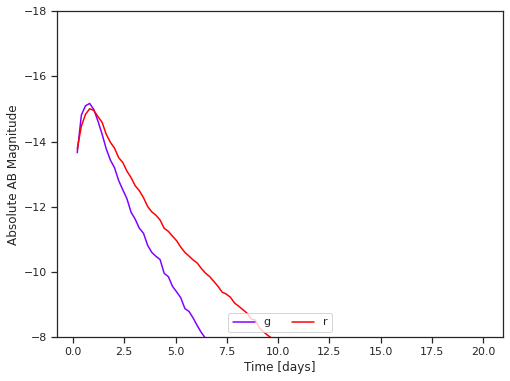

In [7]:
model = models[list(modelkeys)[0]]

colors=cm.rainbow(np.linspace(0,1,len(filts)))
plt.figure(figsize=(8,6))
for filt, color in zip(filts,colors):
    plt.plot(model["t"],model[filt],alpha=1.0,c=color,label=filt)
plt.xlabel('Time [days]')
plt.ylabel('Absolute AB Magnitude')
plt.ylim([-18,-8])
plt.legend(loc="lower center",ncol=5)
plt.gca().invert_yaxis()

## What did the GW170817 data look like?

Below, we read in the actual photometry observed from the 2017 kilonova.

In [10]:
# RUN THIS

from astropy.time import Time

def loadEvent(filename):
    lines = [line.rstrip('\n') for line in open(filename)]
    lines = filter(None,lines)

    data = {}
    for line in lines:
        lineSplit = line.split(" ")
        lineSplit = list(filter(None,lineSplit))
        mjd = Time(lineSplit[0], format='isot').mjd
        filt = lineSplit[1]
        mag = float(lineSplit[2])
        dmag = float(lineSplit[3])

        if not filt in data:
            data[filt] = np.empty((0,3), float)
        data[filt] = np.append(data[filt],np.array([[mjd,mag,dmag]]),axis=0)

    return data 
    
filename = "data/GW170817.dat"
T0 = 57982.5285236896 # Merger time
distance = 40

data_out = loadEvent(filename)

for ii,key in enumerate(list(data_out.keys())):
    if key == "t":
        continue
    else:
        data_out[key][:,0] = data_out[key][:,0] - T0
        data_out[key][:,1] = data_out[key][:,1] - 5*(np.log10(distance*1e6) - 1)

for ii,key in enumerate(list(data_out.keys())):
    if key == "t":
        continue
    else:
        idxs = np.intersect1d(np.where(data_out[key][:,0]>=tini)[0],np.where(data_out[key][:,0]<=tmax)[0])
        data_out[key] = data_out[key][idxs,:]

for ii,key in enumerate(list(data_out.keys())):
    idxs = np.where(~np.isnan(data_out[key][:,2]))[0]
    if key == "t":
        continue
    else:
        data_out[key] = data_out[key][idxs,:]

for ii,key in enumerate(list(data_out.keys())):
    if not key in filts:
        del data_out[key]


## Q2: Plot the GW170817 data

Plot the photometric data for GW170817, separating lightcurves by band, and showing### Q2: Plot the GW170817 data

**Plot the lightcurve for GW170817 for both the g- and r-bands.**

In the cell above, we've defined the following variables:
- `tini`, `tmax`: The minimum and maximum times we'll be examining the lightcurve over
- `data_out`: A dictionary mapping "filter band" -> "lightcurve data"

In `data_out`, each "lightcurve data" array contains 3 columns: ["time (days)", "absolute magnitude", and "error on absolute magnitude"]. You should use the data stored in these columns to plot the lightcurve (absolute magnitude vs. time) for each filter band between `tini` and `tmax`, showing the error bars on each point.

Hints:
- You'll need to remove NaNs and infinite values from your dataset.
- The error bars will typically be small the errorbars. 
You'll note we need to remove NaNs and infinite values from your dataset.

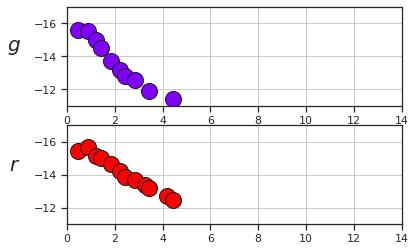

In [16]:
# YOUR CODE HERE

cnt = 0
for filt, color in zip(filts,colors):
    cnt = cnt+1
    if cnt == 1:
        ax1 = plt.subplot(len(filts),1,cnt)
    else:
        ax2 = plt.subplot(len(filts),1,cnt,sharex=ax1,sharey=ax1)

    if not filt in data_out: continue
    samples = data_out[filt]
    t, y, sigma_y = samples[:,0], samples[:,1], samples[:,2]
    idx = np.where(~np.isnan(y))[0]
    t, y, sigma_y = t[idx], y[idx], sigma_y[idx]
    if len(t) == 0: continue

    idx = np.where(np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='o',c=color, markersize=16, label='%s-band'%filt, markeredgecolor='k')

    idx = np.where(~np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='v',c=color, markersize=16, markeredgecolor='k')

    plt.xlim([0.0, 14.0])
    plt.ylim([-17.0,-11.0])
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.ylabel(r'$%s$'%filt,fontsize=20,rotation=0,labelpad=20)


## Q3: Can you try find a model in the `models` dictionary that fits this data "by eye"?

Try plotting a few model lightcurves against the GW170817 lightcurve. Can you find a model that's (roughly) close to the data? If so, what is its name?
- There are over 2,000 models, so don't spend too long on this!

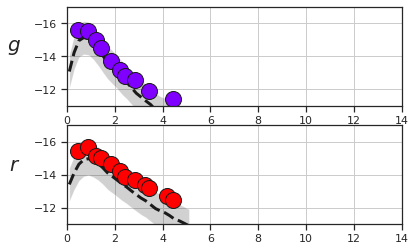

In [17]:
# Try changing the index (which changes the grid entry used)
index = 5
model = models[list(modelkeys)[index]]

errorbudget = 1.0

cnt = 0
for filt, color in zip(filts,colors):
    cnt = cnt+1
    if cnt == 1:
        ax1 = plt.subplot(len(filts),1,cnt)
    else:
        ax2 = plt.subplot(len(filts),1,cnt,sharex=ax1,sharey=ax1)

    if not filt in data_out: continue
    samples = data_out[filt]
    t, y, sigma_y = samples[:,0], samples[:,1], samples[:,2]
    idx = np.where(~np.isnan(y))[0]
    t, y, sigma_y = t[idx], y[idx], sigma_y[idx]
    if len(t) == 0: continue

    idx = np.where(np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='o',c=color, markersize=16, label='%s-band'%filt, markeredgecolor='k')

    idx = np.where(~np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='v',c=color, markersize=16, markeredgecolor='k')

    plt.xlim([0.0, 14.0])
    plt.ylim([-17.0,-11.0])
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.ylabel(r'$%s$'%filt,fontsize=20,rotation=0,labelpad=20)
    
    model = models[list(modelkeys)[0]]
    f = interp.interp1d(model["t"], model[filt], fill_value='extrapolate')
    modelinterp = f(tt)

    plt.plot(tt,modelinterp,'--',c='k',linewidth=3)
    plt.fill_between(tt,modelinterp-errorbudget,modelinterp+errorbudget,facecolor='k',alpha=0.2)    
    


## Q4: Preparing the data - Normalize the model parameters and lightcurve data so that they range from 0-1

Recall that Gaussian processes work best on data that is scaled the same way in every dimension. To ensure this is true for this dataset, we will ensure that our **model parameters** and **lightcurve magnitudes** are scaled so that they all range between 0-1.

In the cell below, we take the parameters of each model in `models` and store them in an array, `param_array_postprocess`. You should normalize each column of this array so that it ranges from 0-1; this will prepare us to find the best-fit parameters.

In [18]:
# Place the relevant parameters into an array
param_array = []
for key in modelkeys:
    if objtype == "BNS":
        param_array.append([np.log10(models[key]["mej_dyn"]),np.log10(models[key]["mej_wind"]),models[key]["phi"],models[key]["theta"]])
    elif objtype == "NSBH":
        param_array.append([np.log10(models[key]["mej_dyn"]),np.log10(models[key]["mej_wind"]),models[key]["theta"]])
param_array_postprocess = np.array(param_array)
        
# YOUR CODE HERE 
param_mins, param_maxs = np.min(param_array_postprocess,axis=0),np.max(param_array_postprocess,axis=0)
for i in range(len(param_mins)):
    param_array_postprocess[:,i] = (param_array_postprocess[:,i]-param_mins[i])/(param_maxs[i]-param_mins[i])

Now, we do the same thing for the lightcurve magnitudes stored in the `models` array. These will be stored in an array called `mag_array_postprocess`; make sure the columns of this array are scaled from 0-1 as well.

In [38]:
# Place the relevant parameters into an array
svd_model = {}
# Loop through filters
for jj,filt in enumerate(filts):
    print('Normalizing mag filter %s...' % filt)
    mag_array = []
    for key in modelkeys:
        mag_array.append(models[key]["data"][:,jj])

    mag_array_postprocess = np.array(mag_array)
    mins,maxs = np.min(mag_array_postprocess,axis=0),np.max(mag_array_postprocess,axis=0)
    for i in range(len(mins)):
        mag_array_postprocess[:,i] = (mag_array_postprocess[:,i]-mins[i])/(maxs[i]-mins[i])
    mag_array_postprocess[np.isnan(mag_array_postprocess)]=0.0
    
    svd_model[filt] = {}
    svd_model[filt]["param_array_postprocess"] = param_array_postprocess
    svd_model[filt]["param_mins"] = param_mins
    svd_model[filt]["param_maxs"] = param_maxs
    svd_model[filt]["mins"] = mins
    svd_model[filt]["maxs"] = maxs
    svd_model[filt]["tt"] = tt
    svd_model[filt]["mag_array_postprocess"] = mag_array_postprocess

Normalizing mag filter g...
Normalizing mag filter r...


In [41]:
svd_model['r'].keys()

dict_keys(['param_array_postprocess', 'param_mins', 'param_maxs', 'mins', 'maxs', 'tt', 'mag_array_postprocess', 'n_coeff', 'cAmat', 'cAstd', 'VA'])

## Q5: Performing PCA - Compute the "singular value decomposition" of the magnitude array

In the cell below, we will reduce the dimensions of the modeled kilonova lightcurves by performing PCA on them and determining the most "important" (aka "principal") components. In particular, we will use an operation called the "singular value decomposition" to do this.
- `np.linalg.svd` is useful here: (https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
- For more on how singular value decomposition works (and how it's related to PCA): https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491


In [40]:
# Loop through filters
for jj,filt in enumerate(filts):
    print('Computing PCA for filter %s...' % filt)

    mag_array_postprocess = svd_model[filt]["mag_array_postprocess"] 
    UA, sA, VA = np.linalg.svd(mag_array_postprocess, full_matrices=True)
    VA = VA.T

    n, n = UA.shape
    m, m = VA.shape

    cAmat = np.zeros((n_coeff,n))
    cAvar = np.zeros((n_coeff,n))
    for i in range(n):
        ErrorLevel = 1.0
        cAmat[:,i] = np.dot(mag_array_postprocess[i,:],VA[:,:n_coeff])
        errors = ErrorLevel*np.ones_like(mag_array_postprocess[i,:])
        cAvar[:,i] = np.diag(np.dot(VA[:,:n_coeff].T,np.dot(np.diag(np.power(errors,2.)),VA[:,:n_coeff])))
    cAstd = np.sqrt(cAvar)

    svd_model[filt]["n_coeff"] = n_coeff
    svd_model[filt]["cAmat"] = cAmat
    svd_model[filt]["cAstd"] = cAstd
    svd_model[filt]["VA"] = VA  

Computing PCA for filter g...
Computing PCA for filter r...


## Q6: Compute the Gaussian Process to interpolate the eigenvalues

Now, we will compute the Gaussian process models on the eigenvalues of the model lightcurves. We will use the `RationalQuadratic` kernel for this task.

In [21]:
# Loop through filters
for jj,filt in enumerate(filts):
    print('Computing GP for filter %s...' % filt)

    cAmat = svd_model[filt]["cAmat"]
    cAstd = svd_model[filt]["cAstd"]
    VA = svd_model[filt]["VA"]
    
    nsvds, nparams = param_array_postprocess.shape
    
    # Set of Gaussian Process
    kernel = 1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
    gps = []
    for i in range(n_coeff):
        if np.mod(i,1) == 0:
            print('Coefficient %d/%d...' % (i+1, n_coeff))
        gp = GaussianProcessRegressor(kernel=kernel,
                                      n_restarts_optimizer=0)
        gp.fit(param_array_postprocess, cAmat[i,:])
        gps.append(gp)
        
    svd_model[filt]["gps"] = gps

Computing GP for filter g...
Coefficient 1/3...
Coefficient 2/3...
Coefficient 3/3...
Computing GP for filter r...
Coefficient 1/3...
Coefficient 2/3...
Coefficient 3/3...


## Save your dictionary to a pickle file for safe keeping
As you notice, this is not a fast computation, so save the model in a pickle file.

In [43]:
modelfile = os.path.join(ModelPath,'%s.pkl' % objtype)
with open(modelfile, 'wb') as handle:
    pickle.dump(svd_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Q7: Using your trained Gaussian process model, interpolate between the points in the model grid, and recover

The GP model you just trained allows us to interpolate between points on the "merger parameter" grid. Now, we can determine the lightcurve 

In the cells below, use your trained GP model to predict the parameters that give rise to the real GW170817 lightcurve.

In [ ]:
# Choose a set of parameters
param_list = [np.log10(0.005), np.log10(0.01), 45, 30]

modelfile = os.path.join(ModelPath,'%s.pkl' % objtype)
with open(modelfile, 'rb') as handle:
    svd_model = pickle.load(handle)

mAB = np.zeros((len(filts),len(tt)))
for jj,filt in enumerate(filts):
    param_array_postprocess = svd_model[filt]["param_array_postprocess"]
    cAmat = svd_model[filt]["cAmat"]
    VA = svd_model[filt]["VA"]
    param_mins = svd_model[filt]["param_mins"]
    param_maxs = svd_model[filt]["param_maxs"]
    mins = svd_model[filt]["mins"]
    maxs = svd_model[filt]["maxs"]
    gps = svd_model[filt]["gps"]
    tt_interp = svd_model[filt]["tt"]

    cAproj = np.zeros((n_coeff,))
    cAstd = np.zeros((n_coeff,))
    for i in range(n_coeff):
        gp = gps[i]
        y_pred, sigma2_pred = gp.predict(np.atleast_2d(param_list_postprocess), return_std=True)
        cAproj[i] = y_pred
        cAstd[i] = sigma2_pred
        
        coverrors = np.dot(VA[:,:n_coeff],np.dot(np.power(np.diag(cAstd[:n_coeff]),2),VA[:,:n_coeff].T))
        errors = np.diag(coverrors)

        mag_back = np.dot(VA[:,:n_coeff],cAproj)
        mag_back = mag_back*(maxs-mins)+mins
        #mag_back = scipy.signal.medfilt(mag_back,kernel_size=3)

        ii = np.where(~np.isnan(mag_back))[0]
        if len(ii) < 2:
            maginterp = np.nan*np.ones(tt.shape)
        else:
            f = interp.interp1d(tt_interp[ii], mag_back[ii], fill_value='extrapolate')
            maginterp = f(tt)
        mAB[jj,:] = maginterp


In [ ]:
errorbudget = 1.0

cnt = 0
for ii, (filt, color) in enumerate(zip(filts,colors)):
    cnt = cnt+1
    if cnt == 1:
        ax1 = plt.subplot(len(filts),1,cnt)
    else:
        ax2 = plt.subplot(len(filts),1,cnt,sharex=ax1,sharey=ax1)

    if not filt in data_out: continue
    samples = data_out[filt]
    t, y, sigma_y = samples[:,0], samples[:,1], samples[:,2]
    idx = np.where(~np.isnan(y))[0]
    t, y, sigma_y = t[idx], y[idx], sigma_y[idx]
    if len(t) == 0: continue

    idx = np.where(np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='o',c=color, markersize=16, label='%s-band'%filt, markeredgecolor='k')

    idx = np.where(~np.isfinite(sigma_y))[0]
    plt.errorbar(t[idx],y[idx],sigma_y[idx],fmt='v',c=color, markersize=16, markeredgecolor='k')

    plt.xlim([0.0, 14.0])
    plt.ylim([-17.0,-11.0])
    plt.gca().invert_yaxis()
    plt.grid()
    
    plt.ylabel(r'$%s$'%filt,fontsize=20,rotation=0,labelpad=20)

    f = interp.interp1d(tt, mAB[ii,:], fill_value='extrapolate')
    maginterp = f(tt)
    #plt.plot(tt,maginterp+zp_best,'--',c=color,linewidth=3)
    #plt.fill_between(tt,maginterp+zp_best-errorbudget,maginterp+zp_best+errorbudget,facecolor=color,alpha=0.2)

    plt.plot(tt,maginterp,'--',c='k',linewidth=3)
    plt.fill_between(tt,maginterp-errorbudget,maginterp+errorbudget,facecolor='k',alpha=0.2)


**Congratulations!** You have just recovered the light curve of the world's most famous kilonova!

### Bonus: Can you use `emcee` or a similar method to estimate the binary parameters?

Another way to predict GW170817's best fit would be to build likelihood function that takes in merger parameters, predicts a model lightcurve from these parameters, and estimates the likelihood of GW170817's lightcurve given this model. Then, an MCMC walker (or other likelihood-maximization algorithm) can determine the set of parameters that maximizes this likelihood. As a bonus question, try to fit the lightcurve this way and compare the best fit to what you got from our original method.

In [14]:
# YOUR CODE HERE

# Extra Credit: Basic Regression

In this problem we will use some simple regression models (provided by the Scikit-learn package) to predict **galaxy redshift** from **galaxy color**.

**Intro: Scikit-learn**

Scikit-learn models, like those used in class, have a fixed syntax so it is the same for a simple linear regression operation as it is for something much more complex such as random forest. The specific model is represented as a class with model parameters defined in the class constructor:

```
class sklearn.linear_model.LinearRegression(
    fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```

The class will also have a <i>fit</i> method for fitting (training) the model which takes the data (X) as a Numpy array of shape [n_samples, n_features] and the response values (y) as a Numpy array of shape [n_samples, n_responses]:
```
def fit(X, y):
    ...
```

## Load and Explore Data

For these exercises, we're going to use a data set of galaxies with known ("spectroscopically confirmed") redshifts and SDSS magnitudes. We're interested in determining the redshift of a galaxy from its colors. This estimate is known as **photometric redshift**; it's useful because it is far easier to estimate the color of a galaxy than to get its spectrum.

In the cells below, we load and plot the galaxy dataset:

In [18]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
sns.set(style="ticks")
%matplotlib inline

In [ ]:
# Loads the galaxy dataset and prints the first few rows

sdss_gal_df = pd.read_csv('data/sdss_gal.csv', low_memory=False)

In [20]:
print(sdss_gal_df.head())

       u-g      g-r      r-i      i-z  redshift
0  1.88235  0.95459  0.44631  0.32659  0.091214
1  1.97871  0.95931  0.46358  0.32285  0.117409
2  1.84007  0.92670  0.40268  0.32295  0.091852
3  1.89717  1.09666  0.47545  0.34684  0.153276
4  0.98144  0.38145  0.34404  0.04365  0.090731


In [21]:
# Plots a random subsample of the data

sdss_gal_sample = sdss_gal_df.sample(n=1000, random_state=0)
redshift = sdss_gal_sample['redshift'].values
gr = sdss_gal_sample['g-r'].values

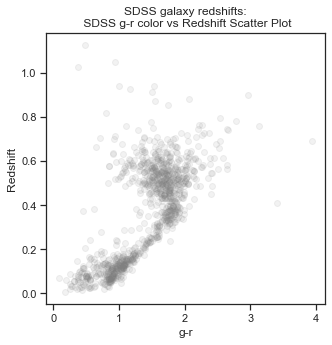

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(gr, redshift, color='gray', alpha=0.1)

ax.set_xlabel('g-r')
ax.set_ylabel('Redshift')
ax.set_title('SDSS galaxy redshifts:\n SDSS g-r color vs Redshift Scatter Plot')

plt.show()

## Q1: modeling the data

We're going to use train_test_split method to create our training and test data sets for a random subsample. We'll set the test set to be half the size of the training set:

In [26]:
sdss_gal_sample = sdss_gal_df.sample(n=1000, random_state=0)

y = sdss_gal_sample['redshift'].values
X = sdss_gal_sample['g-r'].values

X_train, X_test, y_train, y_test = train_test_split(X.reshape((len(X), 1)), y, test_size=0.5, random_state=0)

Now we define our basic linear regressor and fit it to the data.

Confirm that the values of the slope and intercept are what you would expect from a MSE loss function.

In [27]:
regression = LinearRegression(fit_intercept=True)
regression.fit(X_train, y_train)

# YOUR CODE HERE
regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print('The equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

The equation of the regression line is: -0.04764014949686651 + 0.2939707247266168 * x


## Q2: plot the regression line over the data

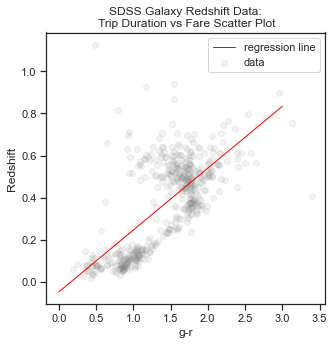

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x_vals = np.linspace(0, 3, 100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X_train, y_train, color='gray', alpha=0.1, label='data')


ax.set_xlabel('g-r')
ax.set_ylabel('Redshift')
ax.set_title('SDSS Galaxy Redshift Data:\n Trip Duration vs Fare Scatter Plot')
ax.legend(loc='best')

plt.show()

## Q3: Train vs Test Error

We would like to evaluate and interpret the modle. Let's have a bit more of a look at the linear model we've fitted.

Compute the MSE values for the training and the test data sets:

In [32]:
# YOUR CODE HERE

train_MSE = np.mean((y_train - regression.predict(X_train))**2)
test_MSE = np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

The train MSE is 0.023277148842551346, the test MSE is 0.025720449934822826


## Q4: Residual Analysis

In residual analysis we want to check that the residuals are uncorrelated and normally distributed.

Plot the residuals. Are they normally distributed?

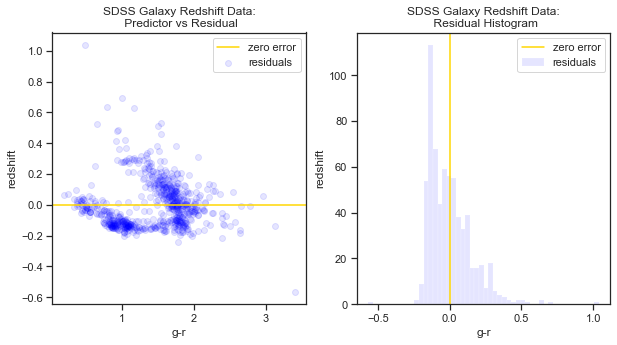

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

errors = y_train - regression.predict(X_train)
ax[0].scatter(X_train, errors, color='blue', alpha=0.1, label='residuals')
ax[0].axhline(y=0, color='gold', label='zero error')


ax[0].set_xlabel('g-r')
ax[0].set_ylabel('redshift')
ax[0].set_title('SDSS Galaxy Redshift Data:\n Predictor vs Residual')
ax[0].legend(loc='best')

ax[1].hist(errors, color='blue', alpha=0.1, label='residuals', bins=50, edgecolor='white', linewidth=2)
ax[1].axvline(x=0, color='gold', label='zero error')


ax[1].set_xlabel('g-r')
ax[1].set_ylabel('redshift')
ax[1].set_title('SDSS Galaxy Redshift Data:\n Residual Histogram')
ax[1].legend(loc='best')

plt.show()

# Extra Credit: regression with multiple parameters

Clearly redshift is not just a function of one color but of several so here we will look at fitting a linear model with multiple parameters.

In [34]:
sdss_gal_sample = sdss_gal_df.sample(n=1000, random_state=0)
#sdss_gal_sample['lpep_pickup_datetime'] = nyc_cab_sample['lpep_pickup_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
#sdss_gal_sample['Lpep_dropoff_datetime'] = nyc_cab_sample['Lpep_dropoff_datetime'].apply(lambda dt: pd.to_datetime(dt).hour)
msk = np.random.rand(len(sdss_gal_sample)) < 0.8
train = sdss_gal_sample[msk]
test = sdss_gal_sample[~msk]

y_train = train['redshift'].values
X_train = train[['g-r', 'r-i', 'i-z']].values

y_test = test['redshift'].values
X_test = test[['g-r', 'r-i', 'i-z']].values

## Q1: Create the linear regression

In [36]:
# YOUR CODE HERE
multi_regression_model = LinearRegression(fit_intercept=True)
multi_regression_model.fit(X_train, y_train)

print('The equation of the regression plane is: {} + {}^T . x'.format(multi_regression_model.intercept_, multi_regression_model.coef_))

The equation of the regression plane is: -0.14195762447790866 + [0.0214793  0.60635948 0.09045038]^T . x


## Q2: Evaluating the Significance of Predictors

In [38]:
from statsmodels.tools import add_constant

predictors_multiple = ['g-r', 'r-i', 'i-z']
predictors_simple = ['g-r']

X_train_multi = add_constant(train[predictors_multiple].values)
X_test_multi = add_constant(test[predictors_multiple].values)

X_train_simple = add_constant(train[predictors_simple].values)
X_test_simple = add_constant(test[predictors_simple].values)

Plot the number of predictors vs the model fitness

In [41]:
cols = ['u-g', 'g-r', 'r-i', 'i-z']
train_R_sq = []
test_R_sq = []
for i in range(1, len(cols) + 1):
    predictors = cols[:i]
    X_train = train[predictors].values
    X_test = test[predictors].values
    
    # YOUR CODE HERE
    multi_regression_model.fit(X_train, y_train)
    
    train_R_sq.append(multi_regression_model.score(X_train, y_train))
    test_R_sq.append(multi_regression_model.score(X_test, y_test))

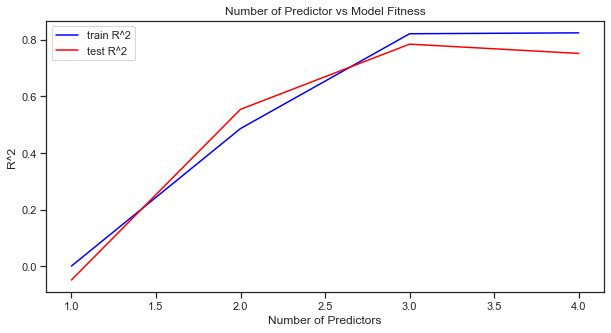

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(1, len(cols) + 1), train_R_sq, color='blue', label='train R^2')
ax.plot(range(1, len(cols) + 1), test_R_sq, color='red', label='test R^2')

ax.set_title('Number of Predictor vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('R^2')
ax.legend(loc='best')

plt.show()

## Q3: Polynomial Regression
What is the effect of Polynomial Degree on model performance? Can you improve the fits using a higher degree polynomial?

In [34]:
y_train = train['redshift'].values
X_train = train[['g-r', 'r-i', 'i-z']].values

y_test = test['redshift'].values
X_test = test[['g-r', 'r-i', 'i-z']].values

gen_poly_terms = PolynomialFeatures(degree=2, interaction_only=False)
X_train_with_poly = gen_poly_terms.fit_transform(X_train)
X_test_with_poly = gen_poly_terms.fit_transform(X_test)

Plot the fit of the model vs. the number of polynomial degrees

In [42]:
from sklearn.preprocessing import MinMaxScaler

train_R_sq = []
test_R_sq = []
max_deg = 10

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

for d in range(1, max_deg + 1):
    gen_poly_terms = PolynomialFeatures(degree=d, interaction_only=False)
    # YOUR CODE HERE
    
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    
    poly_regression_model = LinearRegression(fit_intercept=False)
    poly_regression_model.fit(X_train_with_poly, y_train)
    
    train_R_sq.append(poly_regression_model.score(X_train_with_poly, y_train))
    test_R_sq.append(poly_regression_model.score(X_test_with_poly, y_test))

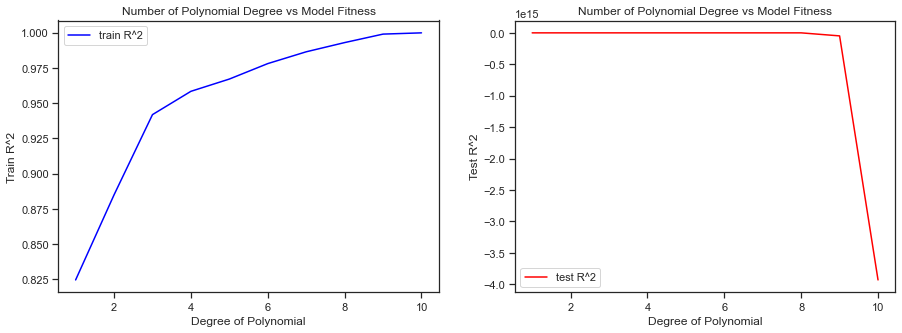

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(range(1, max_deg + 1), np.array(train_R_sq), color='blue', label='train R^2')

ax[0].set_title('Number of Polynomial Degree vs Model Fitness')
ax[0].set_xlabel('Degree of Polynomial')
ax[0].set_ylabel('Train R^2')
ax[0].legend(loc='best')

ax[1].plot(range(1, max_deg + 1), test_R_sq, color='red', label='test R^2')

ax[1].set_title('Number of Polynomial Degree vs Model Fitness')
ax[1].set_xlabel('Degree of Polynomial')
ax[1].set_ylabel('Test R^2')
ax[1].legend(loc='best')


plt.show()

---

# Appendix: Details of the telescope pointing error model

Wallace & Tritton (1976) present a basic geometrical model for a telescope using HA and DEC angles. The model with seven parameters admits of three principal errors and allows for a rudimentary model for flexure error.

#### **Error #1**: Misalignment of the polar axis.

The polar axis of the telescope is defined by the mount (the giant yoke in the case of P200). The
offset of the polar axis with respect to the rotation axis of the Earth has two components: in elevation (ME) and in azimuth (MA). You can raise or lower the pole of the mount to change the elevation angle or rotate the yoke to address the error in azimuth. The misalignment leads to errors in both HA and $\delta$:

 \begin{eqnarray}
	\Delta h&=& \tan(\delta)({\rm ME}\sin(h)-{\rm MA}\cos(h))\\
	\Delta\delta &=& {\rm ME}\cos(h)+{\rm MA}\sin(h)
\end{eqnarray}

#### **Error #2:** Non-perpendicularity of the RA and DEC axes.
Ideally these two axes are supposed to be perpendicular to each other.  Let NP the angle by which the two axis  deviate from being perpendicular.

 \begin{eqnarray}
  \Delta h&=& {\rm NP}\tan\delta
 \end{eqnarray}

#### **Error #3:** Optical Collimation Error.
So far we have two of errors associated with the mount of the telescope. However, the observations are made via telescope optics. As with polar-axis misalignment there are two components: CH and CE.

 \begin{eqnarray} 
        \Delta h&=& {\rm CH}\sec(\delta)\\
	\Delta\delta &=& {\rm CE}
 \end{eqnarray}

#### **Error #4:** Flexure.
This can be complicated term, requiring understanding of the mechanical structure of the telescope.  Wallace
advocates the following as a start.
 \begin{equation}
		\Delta\delta={\rm FO}\cos(h)
 \end{equation}
with no error in $h$. Note that if the mount is asymmetrical in E-W then
flexure could be a winding error that is not symmetrical in HA.

#### Zero point errors. 
In modern telescopes there are no clock errors so IH=0. However there could be zero point offsets
in the encoders (both axes). Next, the declination error of optical collimation error can be absorbed into the zero point error for declination, ID. Finally, the "bore-sight" errors are absorbed by
IH and ID.

Note that these errors are in hour angle and declination. In
particular, while $\Delta h$ is the error the angular error in RA
is $\Delta h\cos(\delta)$. Inversely, $\Delta h$ and $\Delta \delta$
should be used in fitting the observed {\it angular offsets} to
this model one should use $\Delta h$ (and not $\Delta\alpha$) and
$\Delta\delta$.

\begin{eqnarray}
		\label{eq:dh}
	\Delta h&=& \tan(\delta)\big[{\rm ME}\sin(h)-{\rm MA}\cos(h)+{\rm NP}\big]+
	+ {\rm CH}\sec(\delta) + {\rm IH}\\
		\label{eq:dd}\cr
	\Delta\delta &=& \cos(h)\big[{\rm ME}+{\rm FO}\big]+{\rm MA}\sin(h)+{\rm ID}
\end{eqnarray}